In [1]:
%matplotlib inline

In [2]:
import scipy as sp
def logloss(act, pred):
    epsilon = 1e-15
    pred = sp.maximum(epsilon, pred)
    pred = sp.minimum(1-epsilon, pred)
    ll = sum(act*sp.log(pred) + sp.subtract(1,act)*sp.log(sp.subtract(1,pred)))
    ll = ll * -1.0/len(act)
    return ll

In [3]:
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_context("poster")

In [4]:
# A whole world of potential analysis...
kobe = pd.read_csv('data/data.csv')
kobe['known_data_id'] = kobe['shot_made_flag'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [5]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,known_data_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1,0
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,1
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,1
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,1
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,1


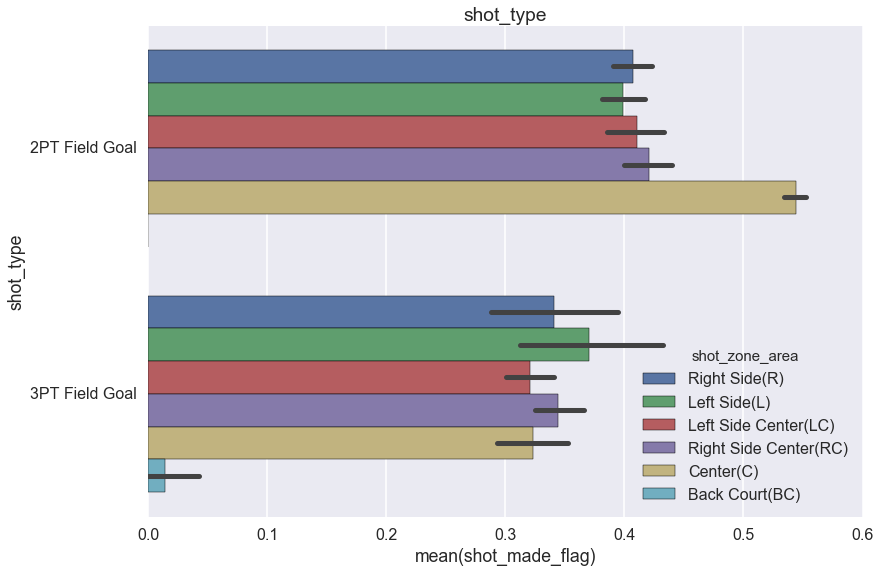

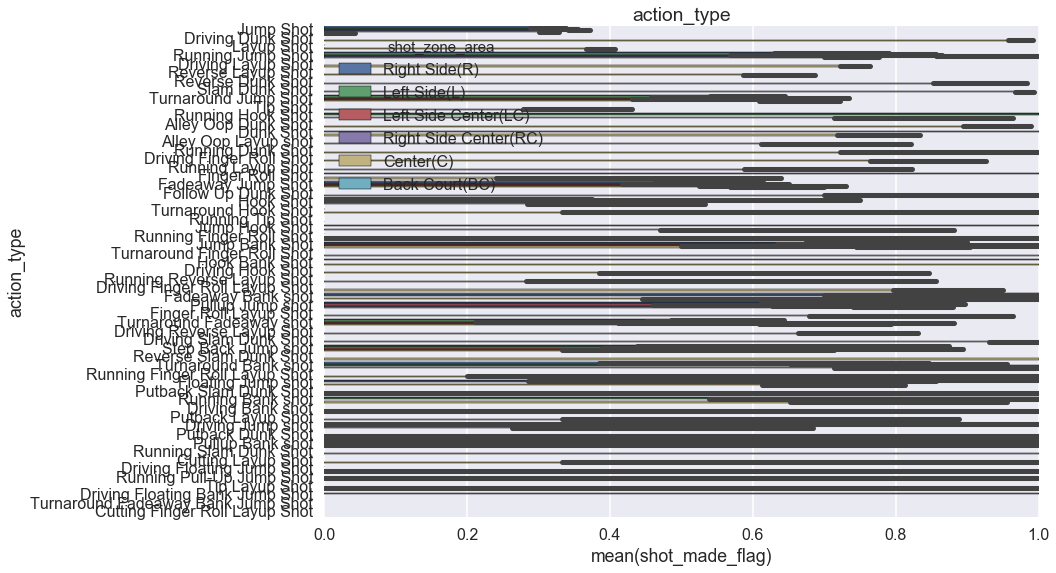

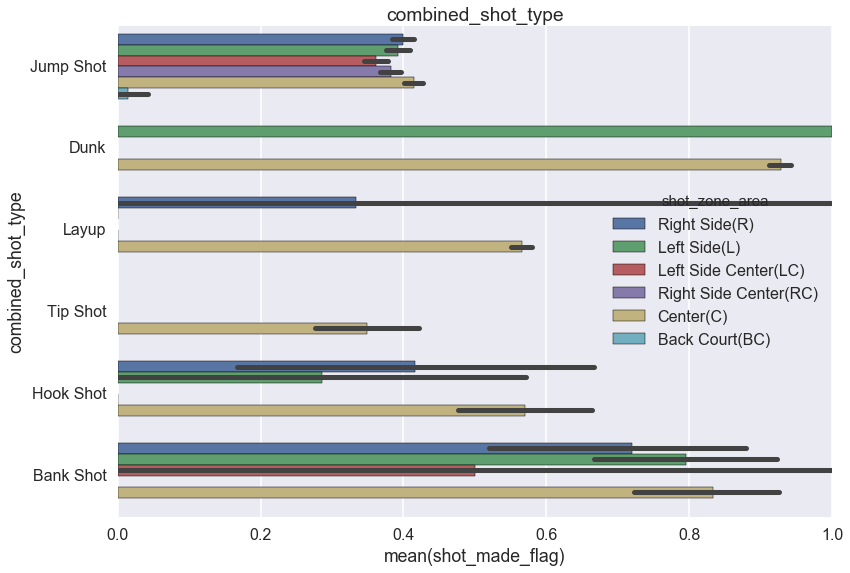

In [6]:
for col in ['shot_type','action_type','combined_shot_type']:
    sns.barplot(x='shot_made_flag',y=col,data=kobe,hue='shot_zone_area')
    plt.title(col)
    plt.show()
    
## Lets create variables by X'ing shot types and combined shot types by shot_zone_area
kobe['shot_type_zone_area'] = kobe.apply(lambda x: x['shot_type']+'_'+x['shot_zone_area'],1)
kobe['combined_shot_type_zone_area'] = kobe.apply(lambda x: x['combined_shot_type']+'_'+x['shot_zone_area'],1)

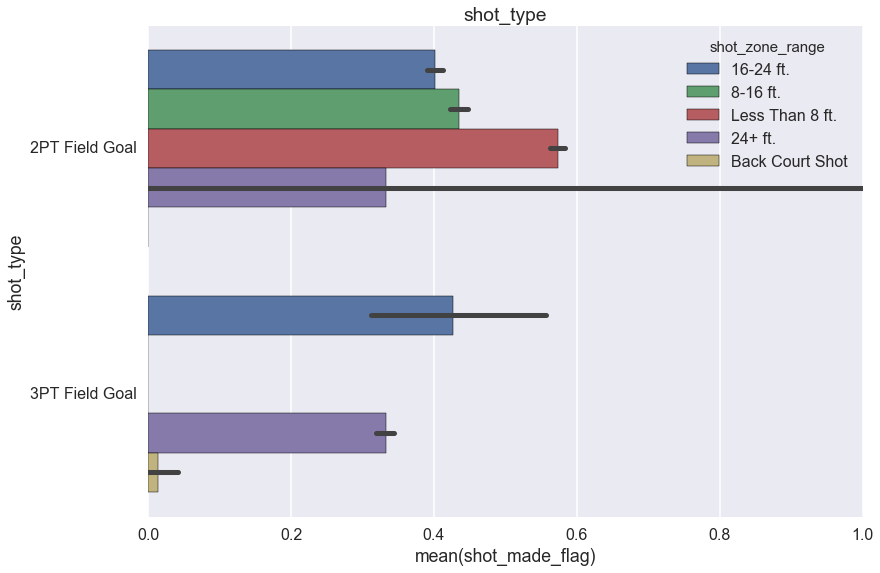

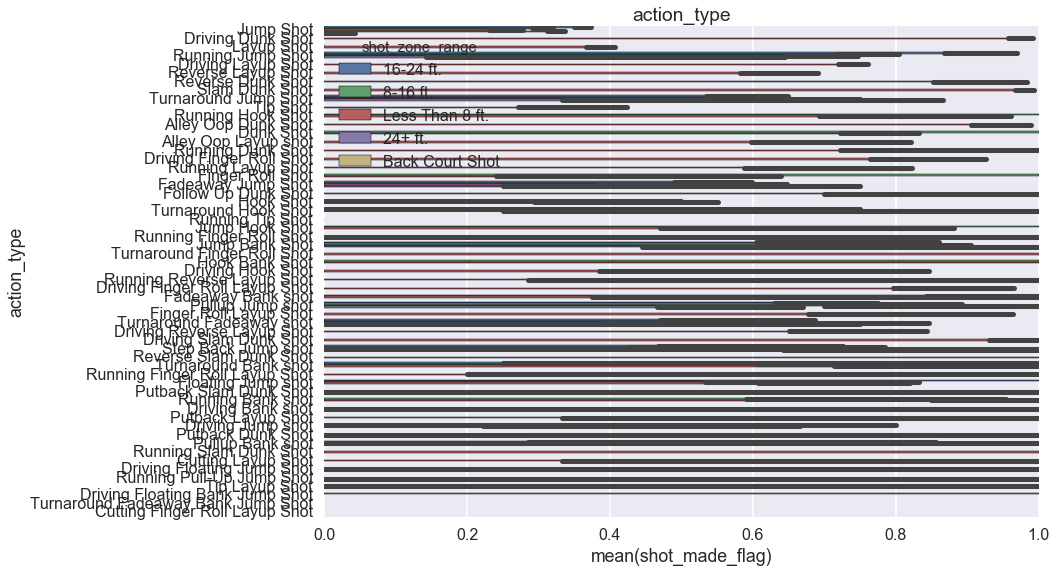

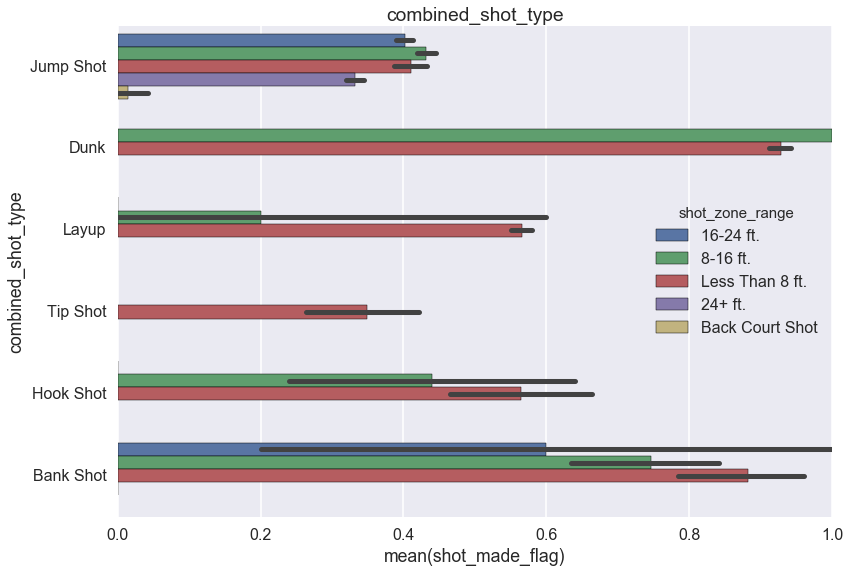

In [7]:
for col in ['shot_type','action_type','combined_shot_type']:
    sns.barplot(x='shot_made_flag',y=col,data=kobe,hue='shot_zone_range')
    plt.title(col)
    plt.show()
    
## Lets create variables by X'ing shot types and combined shot types by shot_zone_area
kobe['shot_type_shot_zone_range'] = kobe.apply(lambda x: x['shot_type']+'_'+x['shot_zone_range'],1)
kobe['combined_shot_type_shot_zone_range'] = kobe.apply(lambda x: x['combined_shot_type']+'_'+x['shot_zone_range'],1)

In [8]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,team_name,game_date,matchup,opponent,shot_id,known_data_id,shot_type_zone_area,combined_shot_type_zone_area,shot_type_shot_zone_range,combined_shot_type_shot_zone_range
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1,0,2PT Field Goal_Right Side(R),Jump Shot_Right Side(R),2PT Field Goal_16-24 ft.,Jump Shot_16-24 ft.
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,1,2PT Field Goal_Left Side(L),Jump Shot_Left Side(L),2PT Field Goal_8-16 ft.,Jump Shot_8-16 ft.
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,1,2PT Field Goal_Left Side Center(LC),Jump Shot_Left Side Center(LC),2PT Field Goal_16-24 ft.,Jump Shot_16-24 ft.
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,1,2PT Field Goal_Right Side Center(RC),Jump Shot_Right Side Center(RC),2PT Field Goal_16-24 ft.,Jump Shot_16-24 ft.
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,1,2PT Field Goal_Center(C),Dunk_Center(C),2PT Field Goal_Less Than 8 ft.,Dunk_Less Than 8 ft.


In [9]:
def create_col_list(kobe):
    cols = pd.DataFrame(kobe.dtypes).reset_index()
    cols.columns = ['col','type']
    return cols

cols = create_col_list(kobe)
cols

,col,type
0,action_type,object
1,combined_shot_type,object
2,game_event_id,int64
3,game_id,int64
4,lat,float64
5,loc_x,int64
6,loc_y,int64
7,lon,float64
8,minutes_remaining,int64
9,period,int64


In [10]:
## Let look at non numerics first - what needs to be changed in them
for col in cols[cols['type']=='object']['col']:
    print 'column: ', col
    print 'uniques: ', len(kobe[col].unique())
    print kobe[col].head()

column:  action_type
uniques:  57
0            Jump Shot
1            Jump Shot
2            Jump Shot
3            Jump Shot
4    Driving Dunk Shot
Name: action_type, dtype: object
column:  combined_shot_type
uniques:  6
0    Jump Shot
1    Jump Shot
2    Jump Shot
3    Jump Shot
4         Dunk
Name: combined_shot_type, dtype: object
column:  season
uniques:  20
0    2000-01
1    2000-01
2    2000-01
3    2000-01
4    2000-01
Name: season, dtype: object
column:  shot_type
uniques:  2
0    2PT Field Goal
1    2PT Field Goal
2    2PT Field Goal
3    2PT Field Goal
4    2PT Field Goal
Name: shot_type, dtype: object
column:  shot_zone_area
uniques:  6
0            Right Side(R)
1             Left Side(L)
2     Left Side Center(LC)
3    Right Side Center(RC)
4                Center(C)
Name: shot_zone_area, dtype: object
column:  shot_zone_basic
uniques:  7
0          Mid-Range
1          Mid-Range
2          Mid-Range
3          Mid-Range
4    Restricted Area
Name: shot_zone_basic, dtype: 

In [11]:
kobe['game_date'].unique()

array(['2000-10-31', '2000-11-01', '2000-11-04', ..., '2000-06-14',
       '2000-06-16', '2000-06-19'], dtype=object)

In [12]:
## Let look at integers
for col in cols[cols['type']=='int64']['col']:
    print 'column: ', col
    print kobe[col].head()

column:  game_event_id
0     10
1     12
2     35
3     43
4    155
Name: game_event_id, dtype: int64
column:  game_id
0    20000012
1    20000012
2    20000012
3    20000012
4    20000012
Name: game_id, dtype: int64
column:  loc_x
0    167
1   -157
2   -101
3    138
4      0
Name: loc_x, dtype: int64
column:  loc_y
0     72
1      0
2    135
3    175
4      0
Name: loc_y, dtype: int64
column:  minutes_remaining
0    10
1    10
2     7
3     6
4     6
Name: minutes_remaining, dtype: int64
column:  period
0    1
1    1
2    1
3    1
4    2
Name: period, dtype: int64
column:  playoffs
0    0
1    0
2    0
3    0
4    0
Name: playoffs, dtype: int64
column:  seconds_remaining
0    27
1    22
2    45
3    52
4    19
Name: seconds_remaining, dtype: int64
column:  shot_distance
0    18
1    15
2    16
3    22
4     0
Name: shot_distance, dtype: int64
column:  team_id
0    1610612747
1    1610612747
2    1610612747
3    1610612747
4    1610612747
Name: team_id, dtype: int64
column:  shot_id
0 

In [13]:
## Lets plot loc_x and loc_y and see if theres anything we want to change
## shot_distance - Shall we create flag for a 3 pointer?
## Whats the differnce between game event id - maybe theres some data in there (events since last shot?)
## 

In [14]:
## Let look at floats
for col in cols[cols['type']=='float64']['col']:
    print 'column: ', col
    print kobe[col].head()

column:  lat
0    33.9723
1    34.0443
2    33.9093
3    33.8693
4    34.0443
Name: lat, dtype: float64
column:  lon
0   -118.1028
1   -118.4268
2   -118.3708
3   -118.1318
4   -118.2698
Name: lon, dtype: float64
column:  shot_made_flag
0    NaN
1    0.0
2    1.0
3    0.0
4    1.0
Name: shot_made_flag, dtype: float64


In [15]:
## This only conatins lat and lon and the preictor class

## Whats the difference between lat/lon and loc_x/loc_y?

In [16]:
## To do
# 1 - Investigate difference in position variables
# 2 - Extract date information
# 3 - Binarize categorical variables
# 4 - Create home and away flag from matchup
# 5 - create master data at an event level
# 6 - Build a function which aggregates to game level
# 7 - Build a function which aggregates to season level
# 8 - build a function which aggregates to lifetime level
# 9 - Recursively go through data and add aggregates to each event given its position (this will take ages!)
# 10 - PCA on all data
# 11 - randomly take 20% of known points out of data for testing
# 12 - Random Forest classification
# 13 - Score on known holdout points

### 1 - Investigate difference in position variables

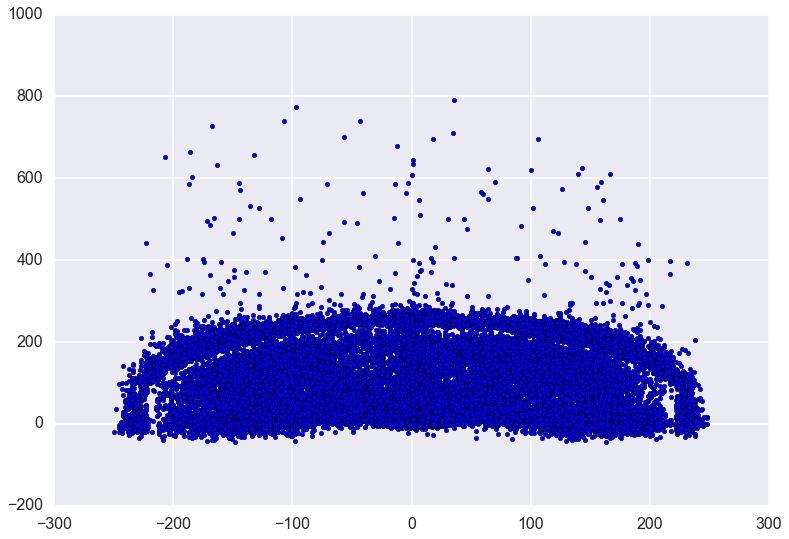

In [17]:
plt.scatter(kobe['loc_x'],kobe['loc_y'])

<function matplotlib.pyplot.legend>

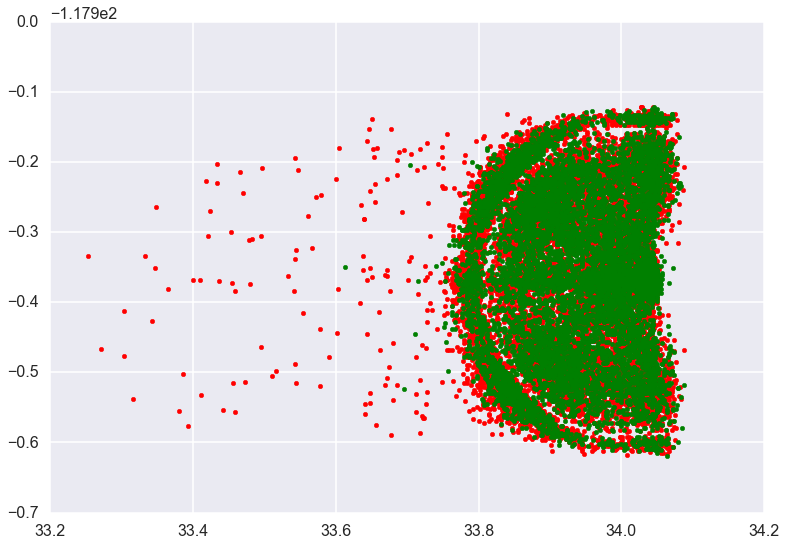

In [18]:
plt.scatter('lat','lon',data=kobe[kobe['shot_made_flag']==0],label='not made',color='r')
plt.scatter('lat','lon',data=kobe[kobe['shot_made_flag']==1],label='made',color='g')
plt.legend

Seems lat/lon and loc_x/loc_y are pretty much the saem variables - lets just lat and lon

In [19]:
kobe = kobe.drop(['loc_x','loc_y'],1)

### 2 - Extract date information

In [20]:
kobe['game_year'] = pd.DatetimeIndex(kobe['game_date']).year
kobe['game_month'] = pd.DatetimeIndex(kobe['game_date']).month
kobe['game_week'] = pd.DatetimeIndex(kobe['game_date']).week
kobe['game_dayofweek'] = pd.DatetimeIndex(kobe['game_date']).dayofweek

In [21]:
kobe = kobe.drop('game_date',1)

## 3 - Binarize categorical variables

In [22]:
bin_cols = cols[(cols['type']=='object') & ~(cols['col'].isin(['game_date','matchup']))]['col']
print bin_cols

0                            action_type
1                     combined_shot_type
11                                season
15                             shot_type
16                        shot_zone_area
17                       shot_zone_basic
18                       shot_zone_range
20                             team_name
23                              opponent
26                   shot_type_zone_area
27          combined_shot_type_zone_area
28             shot_type_shot_zone_range
29    combined_shot_type_shot_zone_range
Name: col, dtype: object


In [23]:
for col in bin_cols:
    binarized = pd.get_dummies(kobe[col],prefix=col)
    kobe = pd.concat([kobe,binarized],1).drop(col,1)
    
kobe.head()

,game_event_id,game_id,lat,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,...,combined_shot_type_shot_zone_range_Hook Shot_Less Than 8 ft.,combined_shot_type_shot_zone_range_Jump Shot_16-24 ft.,combined_shot_type_shot_zone_range_Jump Shot_24+ ft.,combined_shot_type_shot_zone_range_Jump Shot_8-16 ft.,combined_shot_type_shot_zone_range_Jump Shot_Back Court Shot,combined_shot_type_shot_zone_range_Jump Shot_Less Than 8 ft.,combined_shot_type_shot_zone_range_Layup_16-24 ft.,combined_shot_type_shot_zone_range_Layup_8-16 ft.,combined_shot_type_shot_zone_range_Layup_Less Than 8 ft.,combined_shot_type_shot_zone_range_Tip Shot_Less Than 8 ft.
0,10,20000012,33.9723,-118.1028,10,1,0,27,18,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,20000012,34.0443,-118.4268,10,1,0,22,15,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35,20000012,33.9093,-118.3708,7,1,0,45,16,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,43,20000012,33.8693,-118.1318,6,1,0,52,22,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,155,20000012,34.0443,-118.2698,6,2,0,19,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4 - Create home and away flag from matchup

In [24]:
kobe['home_away'] = kobe['matchup'].apply(lambda x: 1 if x.startswith('LAL') else 0)
kobe = kobe.drop('matchup',1)

In [25]:
kobe.head()

,game_event_id,game_id,lat,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,...,combined_shot_type_shot_zone_range_Jump Shot_16-24 ft.,combined_shot_type_shot_zone_range_Jump Shot_24+ ft.,combined_shot_type_shot_zone_range_Jump Shot_8-16 ft.,combined_shot_type_shot_zone_range_Jump Shot_Back Court Shot,combined_shot_type_shot_zone_range_Jump Shot_Less Than 8 ft.,combined_shot_type_shot_zone_range_Layup_16-24 ft.,combined_shot_type_shot_zone_range_Layup_8-16 ft.,combined_shot_type_shot_zone_range_Layup_Less Than 8 ft.,combined_shot_type_shot_zone_range_Tip Shot_Less Than 8 ft.,home_away
0,10,20000012,33.9723,-118.1028,10,1,0,27,18,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,12,20000012,34.0443,-118.4268,10,1,0,22,15,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,35,20000012,33.9093,-118.3708,7,1,0,45,16,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,43,20000012,33.8693,-118.1318,6,1,0,52,22,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,155,20000012,34.0443,-118.2698,6,2,0,19,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [26]:
kobe.columns

Index([u'game_event_id', u'game_id', u'lat', u'lon', u'minutes_remaining',
       u'period', u'playoffs', u'seconds_remaining', u'shot_distance',
       u'shot_made_flag',
       ...
       u'combined_shot_type_shot_zone_range_Jump Shot_16-24 ft.',
       u'combined_shot_type_shot_zone_range_Jump Shot_24+ ft.',
       u'combined_shot_type_shot_zone_range_Jump Shot_8-16 ft.',
       u'combined_shot_type_shot_zone_range_Jump Shot_Back Court Shot',
       u'combined_shot_type_shot_zone_range_Jump Shot_Less Than 8 ft.',
       u'combined_shot_type_shot_zone_range_Layup_16-24 ft.',
       u'combined_shot_type_shot_zone_range_Layup_8-16 ft.',
       u'combined_shot_type_shot_zone_range_Layup_Less Than 8 ft.',
       u'combined_shot_type_shot_zone_range_Tip Shot_Less Than 8 ft.',
       u'home_away'],
      dtype='object', length=216)

In [27]:
## Final - create last shot flag and streak score
kobe['last_shot_made'] = kobe['shot_made_flag'].shift(1).fillna(0)
kobe['streakendflag'] = kobe.apply(lambda x: 1 if x['last_shot_made']!=x['shot_made_flag'] else 0,1)
kobe['streakcumsum'] = kobe['streakendflag'].cumsum()
kobe['streak'] = kobe.groupby('streakcumsum')['shot_made_flag'].cumsum().fillna(0)
kobe = kobe.drop(['streakendflag','streakcumsum'],1)

In [28]:
##Get cumulative game perc
kobe_shot_rank = kobe.groupby('game_id')['shot_id'].rank()
kobe_shots_made = kobe.groupby('game_id')['shot_made_flag'].cumsum()

kobe['game_shot_perc'] = (kobe_shots_made/kobe_shot_rank).shift(1).fillna(method='ffill').fillna(0)
kobe['global_shot_perc'] = (kobe['shot_made_flag'].cumsum()/kobe['shot_id']).fillna(method='ffill').shift(1).fillna(0)

kobe[['game_id','shot_made_flag','game_shot_perc','global_shot_perc']].head(20)

,game_id,shot_made_flag,game_shot_perc,global_shot_perc
0,20000012,NaN,0.000000,0.000000
1,20000012,0.0,0.000000,0.000000
2,20000012,1.0,0.000000,0.000000
3,20000012,0.0,0.333333,0.333333
4,20000012,1.0,0.250000,0.250000
5,20000012,0.0,0.400000,0.400000
6,20000012,1.0,0.333333,0.333333
7,20000012,NaN,0.428571,0.428571
8,20000012,1.0,0.428571,0.428571
9,20000012,0.0,0.444444,0.444444


In [29]:
##sort out minutes.seconds remaining
kobe['time remaining'] = kobe['seconds_remaining'] + kobe['minutes_remaining']*60

kobe[['time remaining','seconds_remaining','minutes_remaining']].head(10)
kobe = kobe.drop(['seconds_remaining','minutes_remaining'],1)

In [30]:
new_cols = create_col_list(kobe)
id_list = [x for x in new_cols['col'] if x.endswith('_id')]
col_list = [x for x in new_cols['col'] if x not in id_list+['shot_made_flag']]

In [31]:
print id_list
print col_list

['game_event_id', 'game_id', 'team_id', 'shot_id', 'known_data_id']
['lat', 'lon', 'period', 'playoffs', 'shot_distance', 'game_year', 'game_month', 'game_week', 'game_dayofweek', 'action_type_Alley Oop Dunk Shot', 'action_type_Alley Oop Layup shot', 'action_type_Cutting Finger Roll Layup Shot', 'action_type_Cutting Layup Shot', 'action_type_Driving Bank shot', 'action_type_Driving Dunk Shot', 'action_type_Driving Finger Roll Layup Shot', 'action_type_Driving Finger Roll Shot', 'action_type_Driving Floating Bank Jump Shot', 'action_type_Driving Floating Jump Shot', 'action_type_Driving Hook Shot', 'action_type_Driving Jump shot', 'action_type_Driving Layup Shot', 'action_type_Driving Reverse Layup Shot', 'action_type_Driving Slam Dunk Shot', 'action_type_Dunk Shot', 'action_type_Fadeaway Bank shot', 'action_type_Fadeaway Jump Shot', 'action_type_Finger Roll Layup Shot', 'action_type_Finger Roll Shot', 'action_type_Floating Jump shot', 'action_type_Follow Up Dunk Shot', 'action_type_Hoo

In [32]:
kobe[id_list].to_csv('data/kobe_x_id.csv',index=False)
kobe[col_list].to_csv('data/kobe_x.csv',index=False)
pd.DataFrame(kobe['shot_made_flag']).to_csv('data/kobe_y.csv',index=False)